# Process
* Downloading a real_world dataset from Kaggle
* Exploratory data analysis and visualization
* Splitting a dataset into training, validation & test sets
* Filling/imputing missing values in numeric columns
* Scaling numeric features to a (0,1)range
* Encoding categorical columns as one-hot vectors
* Training a logistic regression model using Scikit-learn
* Evaluating a model using a valudatation set and test set
* Saving a model to disk and loading it back

# Question:
* how sigmoid works i mean why sigmoid can turn results into probability
* how entry cross works
* what is 最小二乘法：这个是linear regression的算法，直接算出最优解，但是只适合小规模数据

# Logistic regression 
* Logistic regression is classification algorithm

# Download data

In [1]:
import opendatasets as od

In [2]:
od.version()

'0.1.22'

In [3]:
#dataset_url ="https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package"

In [4]:
#od.download(dataset_url)

# Check data information
* problem statement: what is the tomorrow weather (Classification problem)

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(r"D:\Machine_learning_course\models\weatherAUS.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## data information describe
* there are some NaN value except Data and Location(that is a good news), and category features include "Data","Location","WindGustDir","WindDir9am","WindDir3pm","RainToday","RainTomorrow". the RainToday and RainTomorrow are related to our target feature.

# Data Processing and Data visulization
* At the first step we need to drop some rows where RainToday and RainTomorrow are NaN since these two columns are related to our target
* At the second step we need to fill others features with median value or mean value. I personally like medain value
- Data visulization
* At the third step we need to choose useful data
* At the fourth step, we need to turn our category into numeric.

In [8]:
df = df.dropna(subset=['RainToday','RainTomorrow'], axis=0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [10]:
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145454  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ...        71.0   
1            NaN         WNW           44.0        NNW  ...        44.0   
2            NaN         WSW           46.0          W  ...        38.0   
3            NaN          NE           24.0         SE  ...        45.0   
4            NaN           W           41.0        ENE  ...        82.0   
...          ...         ...            ...        ...  ...         ...   
145454       NaN           E           31.0        ESE  ...        59.0   
145455       NaN           E           31.0         SE  ...        51.0   
145456       NaN         NNW           22.0         SE  ...        56.0   
145457       NaN           N           37.0         SE  ...        53.0   
145458       NaN          SE           28.0        SSE  ...        51.0   

        Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0              22.0       1007.7       1007.1       8.0       NaN     16.9   
1              25.0       1010.6       1007.8       NaN       NaN     17.2   
2              30.0       1007.6       1008.7       NaN       2.0     21.0   
3              16.0       1017.6       1012.8       NaN       NaN     18.1   
4              33.0       1010.8       1006.0       7.0       8.0     17.8   
...             ...          ...          ...       ...       ...      ...   
145454         27.0       1024.7       1021.2       NaN       NaN      9.4   
145455         24.0       1024.6       1020.3       NaN       NaN     10.1   
145456         21.0       1023.5       1019.1       NaN       NaN     10.9   
145457         24.0       1021.0       1016.8       NaN       NaN     12.5   
145458         24.0       1019.4       1016.5       3.0       2.0     15.1   

        Temp3pm  RainToday  RainTomorrow  
0          21.8         No            No  
1          24.3         No            No  
2          23.2         No            No  
3          26.5         No            No  
4          29.7         No            No  
...         ...        ...           ...  
145454     20.9         No            No  
145455     22.4         No            No  
145456     24.5         No            No  
145457     26.1         No            No  
145458     26.0         No            No  

[140787 rows x 23 columns]

In [11]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Data visulization(Histogram)

In [12]:
fig = px.histogram(
    df,
    x = "Location",
    color = "RainTomorrow",
    title=  "Location distribution"
)
fig.show()

In [13]:
fig_tem_3pm = px.histogram(
    df,
    x = "Temp3pm",
    color = "RainTomorrow",
    title = "Temp3pm distribution"
)
fig_tem_3pm.show()

In [14]:
px.histogram(df, 
             x='RainTomorrow', 
             color='RainToday', 
             title='Rain Tomorrow vs. Rain Today')

In [15]:
fig_Temp9am_Temp3pm = px.scatter(
    df.sample(1000),
    x = "Temp9am",
    y = "Temp3pm",
    color = "RainToday",
    opacity = 1,
    title = "Temp9am vs Temp3pm"
)
fig_Temp9am_Temp3pm.show()

In [16]:
fig_Temp3pm_humidity3pm = px.scatter(
    df.sample(2000),
    x = "Temp3pm",
    y = "Humidity3pm",
    color = "RainToday",
    color_discrete_sequence=["red", "blue"],
    opacity = 1,
    title = "Temp3pm vs Humidity3pm"
)
fig_Temp3pm_humidity3pm.show()

# Train_test_split(two methods)

In [17]:
from sklearn.model_selection import train_test_split
# train for train data, val for evaluate model after train data so that we can fine tune, test data is used to do final test.
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.2,random_state=42)

In [18]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (90103, 23)
val_df.shape : (22526, 23)
test_df.shape : (28158, 23)


In [19]:
year = pd.to_datetime(df.Date).dt.year

In [20]:
train_df = df[year < 2015]
val_df = df[year == 2015]
test_df = df[year > 2015]

In [21]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


# Choose input and target

In [22]:
input_cols = list(train_df.columns)[1:-1]
target = "RainTomorrow"

In [23]:
input_cols, target

(['Location',
  'MinTemp',
  'MaxTemp',
  'Rainfall',
  'Evaporation',
  'Sunshine',
  'WindGustDir',
  'WindGustSpeed',
  'WindDir9am',
  'WindDir3pm',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Cloud9am',
  'Cloud3pm',
  'Temp9am',
  'Temp3pm',
  'RainToday'],
 'RainTomorrow')

In [24]:
train_input = train_df[input_cols].copy()
train_target = train_df[target].copy()

val_inputs = val_df[input_cols].copy()
val_target = val_df[target].copy()

test_inputs = test_df[input_cols].copy()
test_target = test_df[target].copy()

## choose Number type data, and object type data

In [25]:
numeric_cols = train_input.select_dtypes(include="number").columns.tolist()
categorical_cols = train_input.select_dtypes(include="object").columns.tolist()

In [26]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [27]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [28]:
train_input[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97674.000000  97801.000000  97988.000000  61657.000000  57942.000000   
mean      12.007831     23.022202      2.372935      5.289991      7.609004   
std        6.347175      6.984397      8.518819      3.952010      3.788813   
min       -8.500000     -4.100000      0.000000      0.000000      0.000000   
25%        7.500000     17.900000      0.000000      2.600000      4.800000   
50%       11.800000     22.400000      0.000000      4.600000      8.500000   
75%       16.600000     27.900000      0.800000      7.200000     10.600000   
max       33.900000     48.100000    371.000000     82.400000     14.300000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   91160.000000  97114.000000  96919.000000  96936.000000  96872.000000   
mean       40.215873     14.092263     18.764608     68.628745     51.469547   
std        13.697967      8.984203      8.872398     19.003097     20.756113   
min         6.000000      0.000000      0.000000      0.000000      0.000000   
25%        31.000000      7.000000     13.000000     57.000000     37.000000   
50%        39.000000     13.000000     19.000000     70.000000     52.000000   
75%        48.000000     19.000000     24.000000     83.000000     66.000000   
max       135.000000     87.000000     87.000000    100.000000    100.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  88876.000000  88857.000000  63000.000000  61966.000000  97414.000000   
mean    1017.513734   1015.132352      4.302952      4.410677     16.835126   
std        7.072510      6.997072      2.866634      2.693370      6.404586   
min      980.500000    979.000000      0.000000      0.000000     -5.900000   
25%     1012.800000   1010.400000      1.000000      2.000000     12.200000   
50%     1017.500000   1015.100000      5.000000      5.000000     16.600000   
75%     1022.300000   1019.900000      7.000000      7.000000     21.400000   
max     1041.000000   1039.600000      9.000000      9.000000     40.200000   

            Temp3pm  
count  97392.000000  
mean      21.540138  
std        6.831612  
min       -5.100000  
25%       16.600000  
50%       20.900000  
75%       26.200000  
max       46.100000

In [29]:
train_input[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

## fill missing value
* we will use SimpleImputer to do that "https://scikit-learn.org/stable/modules/impute.html"

In [30]:
import numpy as np
from sklearn.impute import SimpleImputer

In [31]:
imp = SimpleImputer(strategy='median')

In [32]:
df[numeric_cols].isnull().sum() # original dataframe

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

In [33]:
df[numeric_cols]

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6          NaN       NaN           44.0   
1           7.4     25.1       0.0          NaN       NaN           44.0   
2          12.9     25.7       0.0          NaN       NaN           46.0   
3           9.2     28.0       0.0          NaN       NaN           24.0   
4          17.5     32.3       1.0          NaN       NaN           41.0   
...         ...      ...       ...          ...       ...            ...   
145454      3.5     21.8       0.0          NaN       NaN           31.0   
145455      2.8     23.4       0.0          NaN       NaN           31.0   
145456      3.6     25.3       0.0          NaN       NaN           22.0   
145457      5.4     26.9       0.0          NaN       NaN           37.0   
145458      7.8     27.0       0.0          NaN       NaN           28.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145454          15.0          13.0         59.0         27.0       1024.7   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
0            1007.1       8.0       NaN     16.9     21.8  
1            1007.8       NaN       NaN     17.2     24.3  
2            1008.7       NaN       2.0     21.0     23.2  
3            1012.8       NaN       NaN     18.1     26.5  
4            1006.0       7.0       8.0     17.8     29.7  
...             ...       ...       ...      ...      ...  
145454       1021.2       NaN       NaN      9.4     20.9  
145455       1020.3       NaN       NaN     10.1     22.4  
145456       1019.1       NaN       NaN     10.9     24.5  
145457       1016.8       NaN       NaN     12.5     26.1  
145458       1016.5       3.0       2.0     15.1     26.0  

[140787 rows x 16 columns]

In [34]:
imp.fit(df[numeric_cols]) # we will use original data to fill missing value because this dataframe incluede whole data

SimpleImputer(strategy='median')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [36]:
list(imp.statistics_)

[np.float64(12.0),
 np.float64(22.6),
 np.float64(0.0),
 np.float64(4.8),
 np.float64(8.5),
 np.float64(39.0),
 np.float64(13.0),
 np.float64(19.0),
 np.float64(70.0),
 np.float64(52.0),
 np.float64(1017.6),
 np.float64(1015.2),
 np.float64(5.0),
 np.float64(5.0),
 np.float64(16.7),
 np.float64(21.1)]

In [37]:
train_input[numeric_cols] = imp.transform(train_input[numeric_cols])
val_inputs[numeric_cols] = imp.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imp.transform(test_inputs[numeric_cols])

In [38]:
train_input[numeric_cols].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

## Scaling numeric features
* we will use MaxMinScale()

In [39]:
df[numeric_cols].describe()

MinTemp       MaxTemp       Rainfall   Evaporation      Sunshine  \
count  140319.000000  140480.00000  140787.000000  81093.000000  73982.000000   
mean       12.184824      23.23512       2.349974      5.472516      7.630540   
std         6.403879       7.11450       8.465173      4.189132      3.781729   
min        -8.500000      -4.80000       0.000000      0.000000      0.000000   
25%         7.600000      17.90000       0.000000      2.600000      4.900000   
50%        12.000000      22.60000       0.000000      4.800000      8.500000   
75%        16.800000      28.30000       0.800000      7.400000     10.700000   
max        33.900000      48.10000     371.000000    145.000000     14.500000   

       WindGustSpeed   WindSpeed9am   WindSpeed3pm    Humidity9am  \
count  131682.000000  139732.000000  138256.000000  139270.000000   
mean       39.970520      13.990496      18.631141      68.826833   
std        13.578201       8.886210       8.798096      19.063650   
min         6.000000       0.000000       0.000000       0.000000   
25%        31.000000       7.000000      13.000000      57.000000   
50%        39.000000      13.000000      19.000000      70.000000   
75%        48.000000      19.000000      24.000000      83.000000   
max       135.000000     130.000000      87.000000     100.000000   

         Humidity3pm    Pressure9am    Pressure3pm      Cloud9am  \
count  137286.000000  127044.000000  127018.000000  88162.000000   
mean       51.449288    1017.654577    1015.257963      4.431161   
std        20.807310       7.104867       7.035411      2.886594   
min         0.000000     980.500000     977.100000      0.000000   
25%        37.000000    1013.000000    1010.400000      1.000000   
50%        52.000000    1017.600000    1015.200000      5.000000   
75%        66.000000    1022.400000    1020.000000      7.000000   
max       100.000000    1041.000000    1039.600000      9.000000   

           Cloud3pm        Temp9am        Temp3pm  
count  84693.000000  140131.000000  138163.000000  
mean       4.499250      16.987066      21.693183  
std        2.719752       6.496012       6.937784  
min        0.000000      -7.200000      -5.400000  
25%        2.000000      12.300000      16.600000  
50%        5.000000      16.700000      21.100000  
75%        7.000000      21.600000      26.400000  
max        9.000000      40.200000      46.700000

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()
scaler.fit(df[numeric_cols])

MinMaxScaler()

In [42]:
train_input[numeric_cols] = scaler.transform(train_input[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [43]:
train_input[numeric_cols].describe()

MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.483675      0.525924      0.006396      0.035230      0.549872   
std        0.149457      0.131905      0.022962      0.021681      0.203188   
min        0.000000      0.013233      0.000000      0.000000      0.000000   
25%        0.377358      0.429112      0.000000      0.026207      0.517241   
50%        0.478774      0.514178      0.000000      0.033103      0.586207   
75%        0.591981      0.618147      0.002156      0.038621      0.634483   
max        1.000000      1.000000      1.000000      0.568276      0.986207   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean        0.264583      0.108327      0.215715      0.686435      0.514756   
std         0.102447      0.068805      0.101424      0.189013      0.206377   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         0.193798      0.053846      0.149425      0.570000      0.370000   
50%         0.255814      0.100000      0.218391      0.700000      0.520000   
75%         0.310078      0.146154      0.275862      0.830000      0.650000   
max         1.000000      0.669231      1.000000      1.000000      1.000000   

        Pressure9am   Pressure3pm      Cloud9am      Cloud3pm       Temp9am  \
count  97988.000000  97988.000000  97988.000000  97988.000000  97988.000000   
mean       0.611930      0.608618      0.505760      0.514147      0.507053   
std        0.111334      0.106610      0.258077      0.240066      0.134722   
min        0.000000      0.030400      0.000000      0.000000      0.027426   
25%        0.543802      0.540800      0.333333      0.333333      0.409283   
50%        0.613223      0.609600      0.555556      0.555556      0.502110   
75%        0.682645      0.675200      0.666667      0.666667      0.601266   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Temp3pm  
count  97988.000000  
mean       0.517034  
std        0.130727  
min        0.005758  
25%        0.422265  
50%        0.506718  
75%        0.604607  
max        0.988484

# Encoding categorical data
* use pd.get_dummies or use OneHot Encoder, I recommend OneHotEncoder "https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html"

In [44]:
from sklearn.preprocessing import OneHotEncoder

In [45]:
df[categorical_cols]

Location WindGustDir WindDir9am WindDir3pm RainToday
0        Albury           W          W        WNW        No
1        Albury         WNW        NNW        WSW        No
2        Albury         WSW          W        WSW        No
3        Albury          NE         SE          E        No
4        Albury           W        ENE         NW        No
...         ...         ...        ...        ...       ...
145454    Uluru           E        ESE          E        No
145455    Uluru           E         SE        ENE        No
145456    Uluru         NNW         SE          N        No
145457    Uluru           N         SE        WNW        No
145458    Uluru          SE        SSE          N        No

[140787 rows x 5 columns]

In [46]:
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [47]:
eod = OneHotEncoder(handle_unknown='ignore',sparse_output=False,drop="first")
eod.fit(df[categorical_cols])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [48]:
new_columns = eod.get_feature_names_out(categorical_cols) # get all columns for categorical features

In [49]:
encoded_dense_train = eod.transform(train_input[categorical_cols])
encoded_dense_val = eod.transform(val_inputs[categorical_cols])
encoded_dense_test = eod.transform(test_inputs[categorical_cols])

In [50]:
print(train_input.shape)
print(val_inputs.shape)
print(test_inputs.shape)

(97988, 21)
(17089, 21)
(25710, 21)


In [51]:
print(encoded_dense_train.shape)
print(encoded_dense_val.shape)
print(encoded_dense_test.shape)

(97988, 97)
(17089, 97)
(25710, 97)


In [52]:
encoded_train_input = pd.DataFrame(
    encoded_dense_train,           
    columns=new_columns,      
    index=train_input.index   
)
encoded_val_input = pd.DataFrame(
    encoded_dense_val,           
    columns=new_columns,     
    index=val_inputs.index  
)
encoded_test_input = pd.DataFrame(
    encoded_dense_test,          
    columns=new_columns,   
    index=test_inputs.index   
)

In [71]:
encoded_train_input.head() 

Location_Albany  Location_Albury  Location_AliceSprings  \
0              0.0              1.0                    0.0   
1              0.0              1.0                    0.0   
2              0.0              1.0                    0.0   
3              0.0              1.0                    0.0   
4              0.0              1.0                    0.0   

   Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  \
0                     0.0                0.0               0.0   
1                     0.0                0.0               0.0   
2                     0.0                0.0               0.0   
3                     0.0                0.0               0.0   
4                     0.0                0.0               0.0   

   Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  ...  \
0                0.0              0.0                0.0             0.0  ...   
1                0.0              0.0                0.0             0.0  ...   
2                0.0              0.0                0.0             0.0  ...   
3                0.0              0.0                0.0             0.0  ...   
4                0.0              0.0                0.0             0.0  ...   

   WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  \
0           0.0            0.0             0.0             0.0            0.0   
1           0.0            0.0             0.0             0.0            0.0   
2           0.0            0.0             0.0             0.0            0.0   
3           0.0            0.0             0.0             0.0            0.0   
4           0.0            0.0             0.0             0.0            0.0   

   WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_Yes  
0           0.0             1.0             0.0             0.0            0.0  
1           0.0             0.0             1.0             0.0            0.0  
2           0.0             0.0             1.0             0.0            0.0  
3           0.0             0.0             0.0             0.0            0.0  
4           0.0             0.0             0.0             0.0            0.0  

[5 rows x 97 columns]

In [72]:
train_input.head()

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0  0.516509  0.523629  0.001617     0.033103  0.586207       0.294574   
1  0.375000  0.565217  0.000000     0.033103  0.586207       0.294574   
2  0.504717  0.576560  0.000000     0.033103  0.586207       0.310078   
3  0.417453  0.620038  0.000000     0.033103  0.586207       0.139535   
4  0.613208  0.701323  0.002695     0.033103  0.586207       0.271318   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  WindDir3pm_S  \
0      0.153846      0.275862         0.71         0.22  ...           0.0   
1      0.030769      0.252874         0.44         0.25  ...           0.0   
2      0.146154      0.298851         0.38         0.30  ...           0.0   
3      0.084615      0.103448         0.45         0.16  ...           0.0   
4      0.053846      0.229885         0.82         0.33  ...           0.0   

   WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0            0.0             0.0             0.0            0.0           0.0   
1            0.0             0.0             0.0            0.0           0.0   
2            0.0             0.0             0.0            0.0           0.0   
3            0.0             0.0             0.0            0.0           0.0   
4            0.0             0.0             0.0            0.0           0.0   

   WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_nan  RainToday_Yes  
0             1.0             0.0             0.0            0.0  
1             0.0             1.0             0.0            0.0  
2             0.0             1.0             0.0            0.0  
3             0.0             0.0             0.0            0.0  
4             0.0             0.0             0.0            0.0  

[5 rows x 113 columns]

In [53]:
# drop original columns 
train_input.drop(columns=categorical_cols, inplace=True)
val_inputs.drop(columns=categorical_cols, inplace=True)
test_inputs.drop(columns=categorical_cols, inplace=True)

# Combine train_input and encoded_columns
train_input = pd.concat([train_input, encoded_train_input], axis=1)
val_input = pd.concat([val_inputs,encoded_val_input], axis=1)
test_input = pd.concat([test_inputs, encoded_test_input], axis=1)

In [54]:
train_input.shape, val_input.shape,test_input.shape

((97988, 113), (17089, 113), (25710, 113))

In [55]:
#target = {"No":0,"Yes":1}
#train_target = train_target.map(target)
#val_target = val_target.map(target)
#test_target = test_target.map(target)

In [56]:
train_target.shape,val_target.shape,test_target.shape

((97988,), (17089,), (25710,))

# model_train

In [57]:
# Check shape to make sure every samples are same
print(train_input.shape,train_target.shape)
print(val_input.shape,val_target.shape)
print(test_input.shape,test_target.shape)

(97988, 113) (97988,)
(17089, 113) (17089,)
(25710, 113) (25710,)


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
model = LogisticRegression(solver="liblinear")

In [60]:
train_target.isnull().sum()

np.int64(0)

In [61]:
train_target

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [62]:
model.fit(train_input,train_target)

LogisticRegression(solver='liblinear')

In [63]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [64]:
y_train=model.predict(train_input)

In [65]:
accuracy_score(train_target, y_train)

0.8519512593378781

In [66]:
confusion_matrix(train_target, y_train, normalize='true')


array([[0.94618716, 0.05381284],
       [0.47742912, 0.52257088]])

# Prediction

In [67]:
def predict_and_plot(model,input,target,name):
    y_pred = model.predict(input)

    accuracy = accuracy_score(target,y_pred)
    print(f"Accuracy:{accuracy:.2f}")

    cm = confusion_matrix(target,y_pred,normalize='true')
    plt.figure()
    sns.heatmap(cm, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))

    return accuracy

Accuracy:0.85


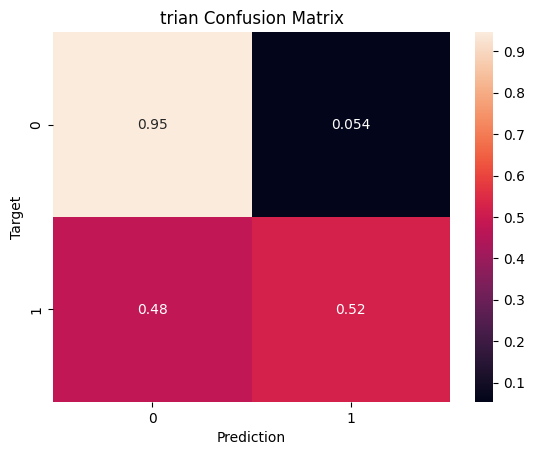

In [68]:
train_accuracy = predict_and_plot(model=model,input=train_input,target=train_target,name="trian")